In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

In [3]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [4]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [5]:
#download("https://github.com/AllenDowney/ThinkStats2/raw/master/solutions/chap02soln.ipynb")
#download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/chap02ex.ipynb")

## Examples from Chapter 2

In [6]:
import nsfg

In [7]:
# Read NSFG data into a Pandas DataFrame.
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1] # Live births

/workspace/python_machinelearning/nsfg.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
/workspace/python_machinelearning/nsfg.py:69: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

In [8]:
import thinkstats2
import thinkplot

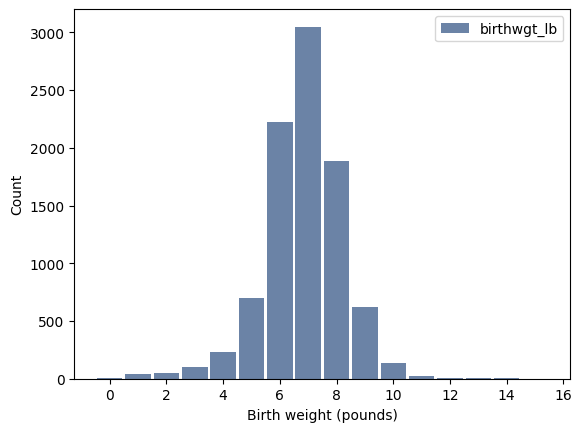

In [9]:
# Here's the histogram of birth weights in pounds using the Hist function
# Notice that Hist works with anything iterable, including a Pandas Series. 
# The label attribute appears in the legend when you plot the Hist.
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

<function matplotlib.pyplot.show(close=None, block=None)>

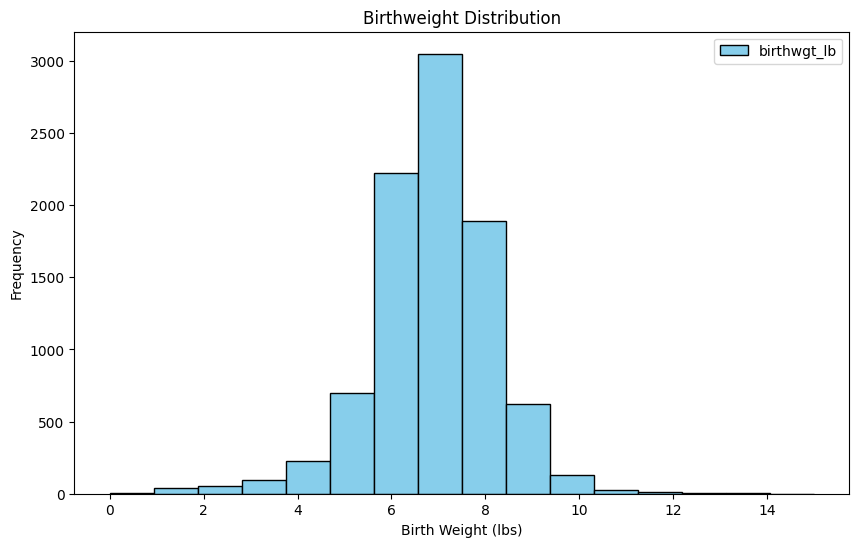

In [10]:
# Create a histogram for birthweight
birthwgt_round = np.floor(live.birthwgt_lb) # round birthweight down
bins = birthwgt_round.value_counts().sort_index().count() # calculate the number of grouped birthweights
plt.figure(figsize=(10, 6))
plt.hist(live.birthwgt_lb, bins=bins, color='skyblue', edgecolor='black', label='birthwgt_lb')
plt.title('Birthweight Distribution')
plt.xlabel('Birth Weight (lbs)')
plt.ylabel('Frequency')
plt.legend(loc='upper right') 
plt.show

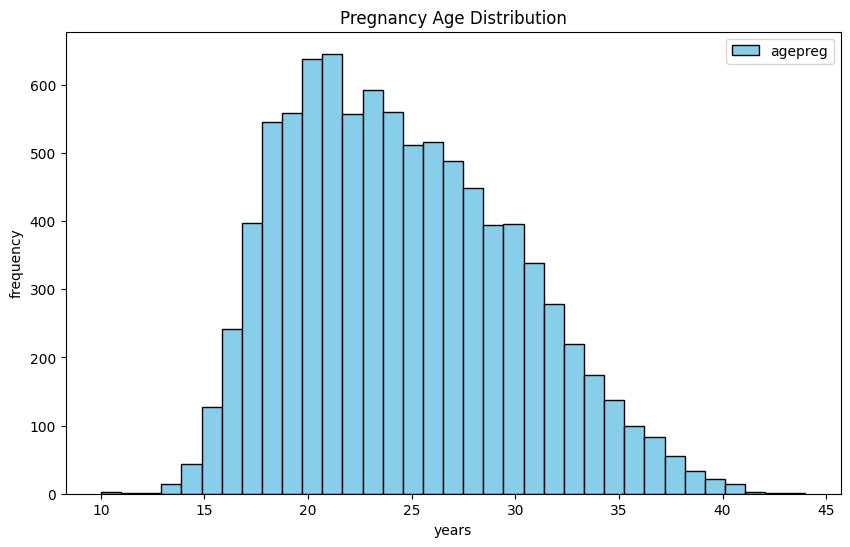

In [11]:
# Round down the age values
ages = np.floor(live.agepreg)
# print(ages.value_counts().sort_index())
bins = ages.value_counts().sort_index().count() # save count of rounded age groups for plot
plt.figure(figsize=(10,6))
plt.hist(ages, bins=bins, color='skyblue', edgecolor='black', label='agepreg')
plt.title('Pregnancy Age Distribution')
plt.xlabel('years')
plt.ylabel('frequency')
plt.legend(loc='upper right')
plt.show()

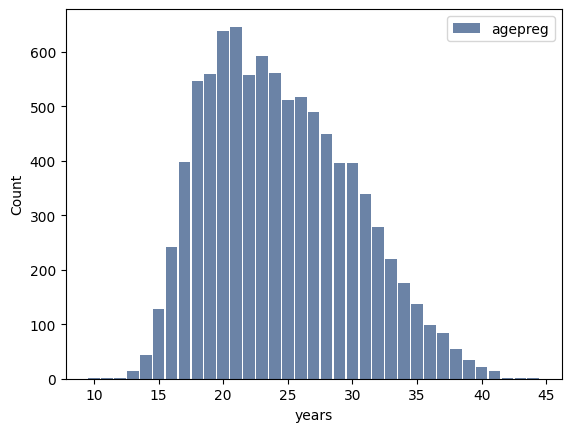

In [12]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

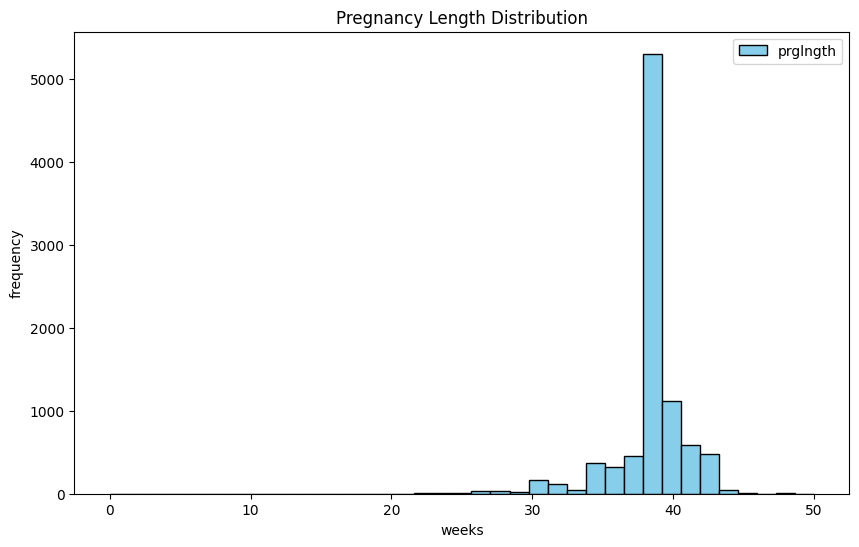

In [13]:
# plot the histogram of pregnancy lengths
bins = live.prglngth.value_counts().sort_index().count() # use count of groups as bin number for plot
plt.figure(figsize=(10,6))
hist2 = plt.hist(live.prglngth, bins=bins, color='skyblue', edgecolor='black', label='prglngth')
plt.title('Pregnancy Length Distribution')
plt.xlabel('weeks')
plt.ylabel('frequency')
plt.legend(loc='upper right')
plt.show()

In [14]:
# Smallest pregnancy length values
print(live.prglngth.value_counts().sort_index()[0:10])

# Largest pregnancy length values
print(live.prglngth.value_counts().sort_index()[-7:])

prglngth
0     1
4     1
9     1
13    1
17    2
18    1
19    1
20    1
21    2
22    7
Name: count, dtype: int64
prglngth
43    148
44     46
45     10
46      1
47      1
48      7
50      2
Name: count, dtype: int64


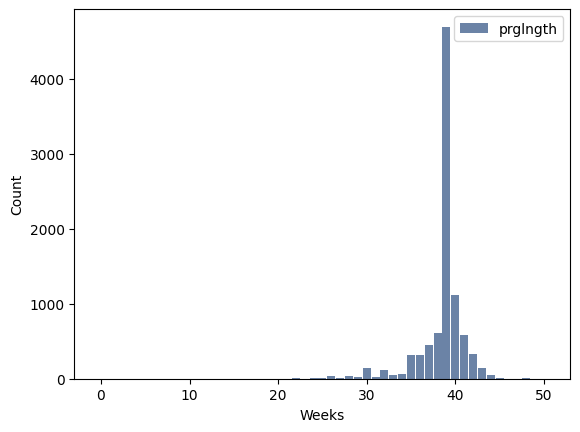

In [15]:
hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Weeks', ylabel='Count')

In [16]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


In [17]:
for weeks, freq in hist.Largest(7):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148


From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

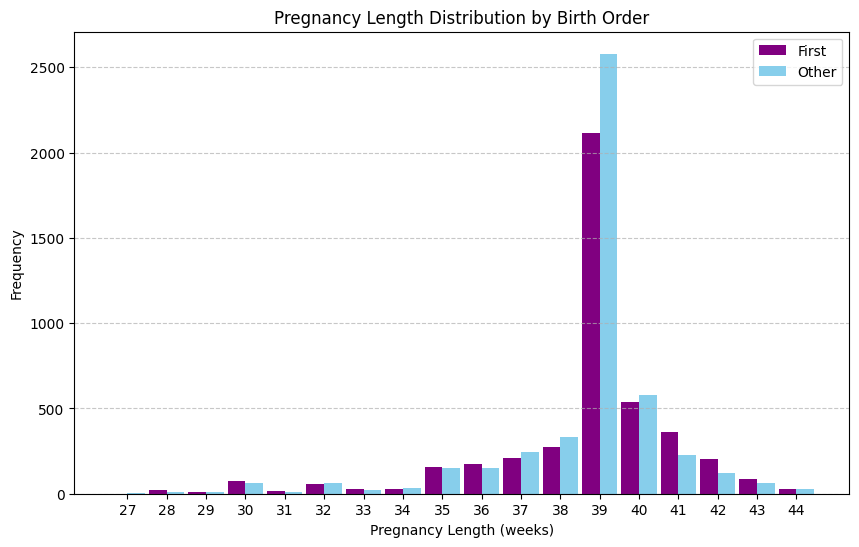

In [18]:
# Filter data for the two groups
first = live[live.birthord == 1]
other = live[live.birthord != 1]

# Define bin edges for consistency
bins = np.arange(27,46) # for pregnancy from 27 to 46 weeks

# Calculate histogram data for both groups
first_child_hist, _ = np.histogram(first.prglngth, bins=bins)
other_children_hist, _ = np.histogram(other.prglngth, bins=bins)

# Create bar positions for side-by-side plotting
bar_width = 0.45
bin_centers = bins[:-1]  # Use the left edges of bins
first_child_positions = bin_centers - bar_width / 2
other_children_positions = bin_centers + bar_width / 2

# Plot the histogram
plt.figure(figsize=(10,6))
plt.bar(first_child_positions, first_child_hist, width=bar_width, color='purple', label='First')
plt.bar(other_children_positions, other_children_hist, width=bar_width, color='skyblue', label="Other")

# Add titles and labels
plt.title('Pregnancy Length Distribution by Birth Order')
plt.xlabel('Pregnancy Length (weeks)')
plt.ylabel('Frequency')
plt.xticks(bin_centers, bins[:-1])  # Ensure bins are labeled correctly
plt.legend()

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


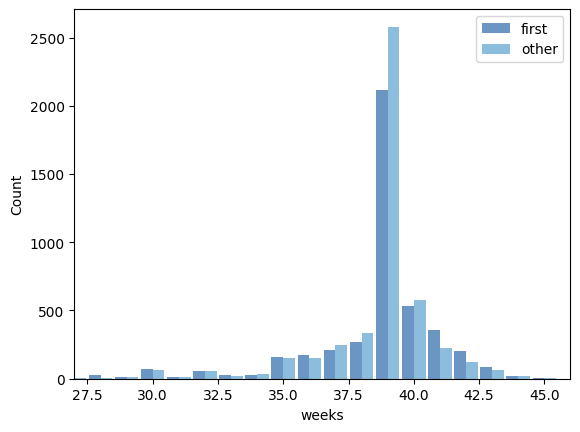

In [19]:
# Using the thinkstats and thinkplot libraries
first_hist = thinkstats2.Hist(first.prglngth, label='first')
other_hist = thinkstats2.Hist(other.prglngth, label='other')

# We can use width and align to plot two histograms side-by-side.
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

#### Summarizing Distributions
If we want to summarize the distribution with a few descriptive statistics some of the characteritics we might want to report are
- central tendency
- modes
- spread
- tails
- outliers

In [20]:
mean = live.prglngth.mean()
median = live.prglngth.median()
var = live.prglngth.var()
std = live.prglngth.std()

print(mean.round(1), std.round(1))
print(median.round(1))

38.6 2.7
39.0


In [21]:
# Here's are the mean pregnancy lengths for first babies and others:
print(first.prglngth.mean().round(3), other.prglngth.mean().round(3))

38.601 38.523


In [22]:
# And here's the difference (in weeks):
print((first.prglngth.mean() - other.prglngth.mean()).round(3)) # weeks
print(((first.prglngth.mean() - other.prglngth.mean()) * 7 * 24).round(3)) # hours

0.078
13.11


Cohen's effect size is a statistical measure used to quantify the magnitude of an effect or the difference between two groups in a standardized way. It provides insight into how large or meaningful a difference is, independent of the sample size.

In [23]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """  
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff /  np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [24]:
cohen = float(CohenEffectSize(first.prglngth, other.prglngth).round(3))
cohen

0.029

Interpretation (rule of thumb):
- Small effect: d=0.2
- Medium effect: d=0.5
- Large effect: d=0.8

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others.

Compute Cohen’s effect size to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

In [25]:
firstwgt = first.totalwgt_lb  # First child weight in lbs
otherwgt = other.totalwgt_lb  # Other children weight in lbs

print("Min weight for first child:", firstwgt.min())
print("Max weight for first child:", firstwgt.max())
print("Min weight for other children:", otherwgt.min())
print("Max weight for other children:", otherwgt.max())

bins = np.arange(np.floor(firstwgt.min()), np.ceil(firstwgt).max()+1, 1)  # Define bins
counts_first, bin_edges = np.histogram(firstwgt, bins=bins)
counts_other, _ = np.histogram(otherwgt, bins=bins)

print("Histogram Information")
print("Bins:", bin_edges)

print("Counts for first child:", counts_first)
print("Counts for other children:", counts_other)
bin_centers = bins[:-1]+0.5
print("Bin Centers:", bin_centers)

Min weight for first child: 0.125
Max weight for first child: 15.4375
Min weight for other children: 0.5625
Max weight for other children: 14.0
Histogram Information
Bins: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
Counts for first child: [   5   25   27   48  117  355 1121 1504  816  266   54   14    8    1
    1    1]
Counts for other children: [   2   15   26   50  110  337 1093 1527 1065  354   78   12    2    2
    2    0]
Bin Centers: [ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5]


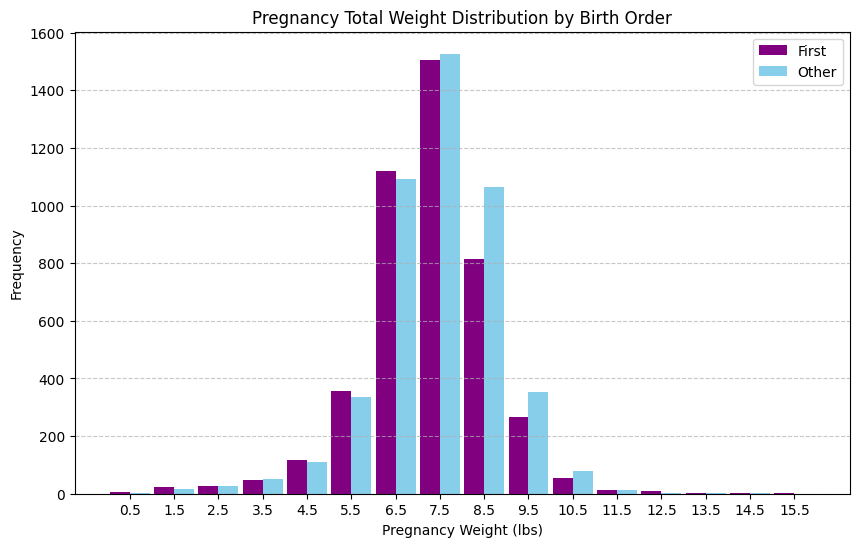

In [26]:
# Create a histogram for total weight of first babies versus other
# Define bin edges for consistency
bins = np.arange(np.floor(first.totalwgt_lb.min()), np.ceil(first.totalwgt_lb).max()+1, 1)  # Define bins

# Calculate histogram data for both groups
first_child_hist, _ = np.histogram(first.totalwgt_lb, bins=bins)
other_children_hist, _ = np.histogram(other.totalwgt_lb, bins=bins)

# Create bar positions for side-by-side plotting
bar_width = 0.45
bin_centers = bins[:-1]  # Use the left edges of bins
first_child_positions = bin_centers + 0.5 - bar_width /2
other_children_positions = bin_centers + 0.5 + bar_width / 2

# Plot the histogram
plt.figure(figsize=(10,6))
plt.bar(first_child_positions, first_child_hist, width=bar_width, color='purple', label='First')
plt.bar(other_children_positions, other_children_hist, width=bar_width, color='skyblue', label='Other')

# Add titles and labels
plt.title('Pregnancy Total Weight Distribution by Birth Order')
plt.xlabel('Pregnancy Weight (lbs)')
plt.ylabel('Frequency')
bin_centers = bins[:-1]+0.5
plt.xticks(bin_centers, bins[:-1]+0.5)  # Ensure bins are labeled correctly
plt.legend()

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Mean and Standard Deviation for Total Weight for First and Other Children

In [27]:
mean_first = first.totalwgt_lb.mean()
mean_other = other.totalwgt_lb.mean()
std_first = first.totalwgt_lb.std()
std_other = other.totalwgt_lb.std()

print(mean_first.round(2))
print(std_first.round(2))
print(mean_other.round(2))
print(std_other.round(2))

7.2
1.42
7.33
1.39


Cohen Effect for Total Weight of First and Other Children

In [28]:
cohen = float(CohenEffectSize(first.totalwgt_lb, other.totalwgt_lb).round(3))
cohen

-0.089

In [29]:
resp = nsfg.ReadFemResp()

Make a histogram of `totincr` the total income for the respondent's family. To interpret the codes see the [codebook](https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Female.pdf).

14
[ 299.  301.  266.  421.  445.  559.  583.  606.  607.  468.  647.  658.
  623. 1160.] [ 1.          1.92857143  2.85714286  3.78571429  4.71428571  5.64285714
  6.57142857  7.5         8.42857143  9.35714286 10.28571429 11.21428571
 12.14285714 13.07142857 14.        ] <BarContainer object of 14 artists>


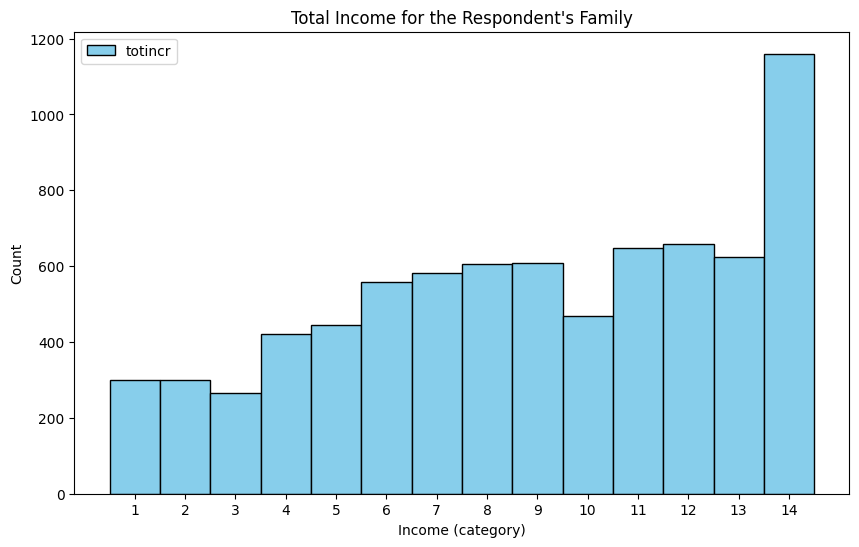

In [30]:
bins = resp.totincr.value_counts().sort_index().count() # use count of groups as bin
print(bins)
plt.figure(figsize=(10,6))
counts, bin_edges, bars = plt.hist(resp.totincr, bins=bins, color='skyblue', edgecolor='black', label='totincr')
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

print(counts, bin_edges, bars)

plt.xticks(bin_centers, labels=range(1,bins+1))
plt.title("Total Income for the Respondent's Family")
plt.xlabel('Income (category)')
plt.ylabel('Count')
plt.legend()
plt.show()

Make a histogram of `age_r`, the respondent's age at the time of interview.

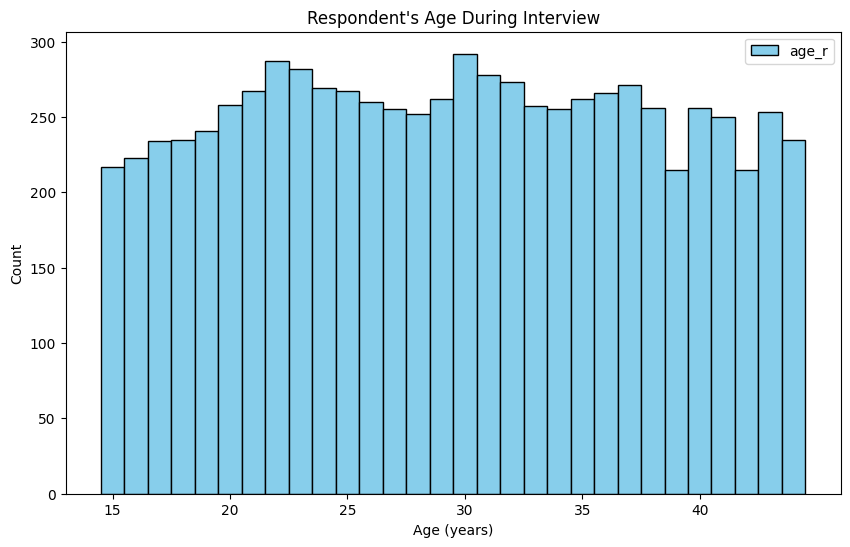

In [347]:
import pandas as pd

bins = resp.age_r.value_counts().sort_index().count() # use count of groups as bin
plt.figure(figsize=(10,6))
counts, bin_edges, bars = plt.hist(resp.age_r, bins=bins, color="skyblue", edgecolor='black', label='age_r')

#print(resp.age_r.value_counts().sort_index()) # value for each group

# Calculate the center for each bin/bar
bin_centers = (bin_edges[:-1] + (bin_edges[1] - bin_edges[0]) / 2)

n = 5 # Label every 5th tick
selected_ticks = bin_centers[::n] # Take every nth bin center
selected_labels = [round(center) for center in selected_ticks] # create a label for each tick

# if want to use every tick but print the label for every nth tick then use the 
# selected_label below with the bin_centers variable
# selected_ticks = bin_centers
#selected_ticks = bin_centers
#selected_labels = [f"{round(center)}" if i % n == 0 else "" for i, center in enumerate(bin_centers)]

# Create the ticks and labels at the appropriate locations
plt.xticks(selected_ticks, selected_labels)

plt.title("Respondent's Age During Interview")
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.legend()
plt.show()

Make a histogram of `numfmhh`, the number of people in the respondent's household.

numfmhh
0     942
1    1716
2    1826
3    1740
4     906
5     313
6     118
7      78
8       4
Name: count, dtype: int64


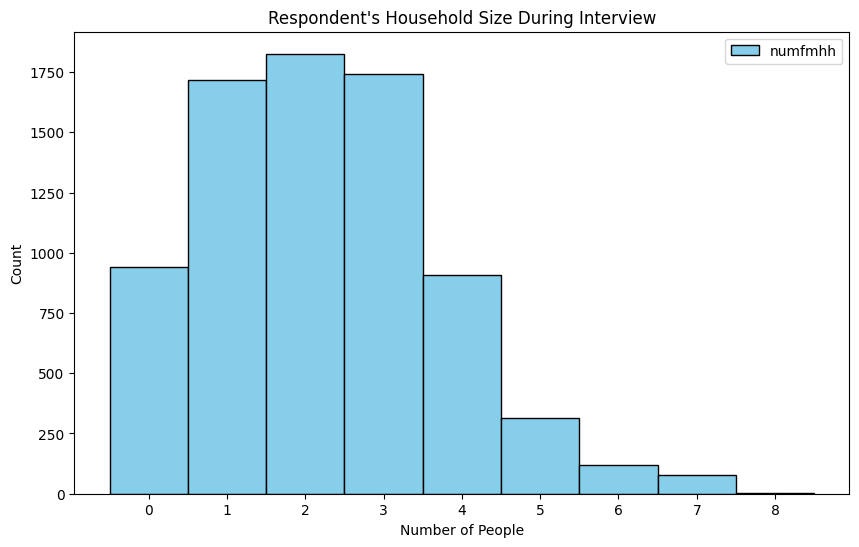

In [384]:
print(resp.numfmhh.value_counts().sort_index())
bins = resp.numfmhh.value_counts().sort_index().count()
plt.figure(figsize=(10,6))
counts, bin_edges, bars = plt.hist(resp.numfmhh, bins=bins, color="skyblue", edgecolor='black', label='numfmhh')

# Calculate the center for each bar
bin_centers = bin_edges[:-1] + (bin_edges[1] - bin_edges[0]) / 2
selected_labels = [round(center) for center in bin_centers]

# Plot the xticks at the bar centers
plt.xticks(bin_centers, selected_labels)

plt.title("Respondent's Household Size During Interview")
plt.xlabel('Number of People')
plt.ylabel('Count')
plt.legend()
plt.show()

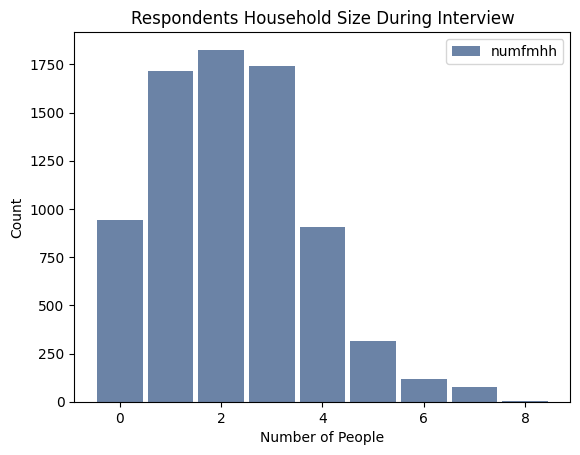

In [420]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label='numfmhh')
thinkplot.Config(title='Respondents Household Size During Interview', xlabel='Number of People', ylabel='Count')

Make a histogram of `parity`, the number of children borne by the respondent. How would you describe this distribution?

parity
0     3230
1     1519
2     1603
3      828
4      309
5       95
6       29
7       15
8        8
9        2
10       3
16       1
22       1
Name: count, dtype: int64


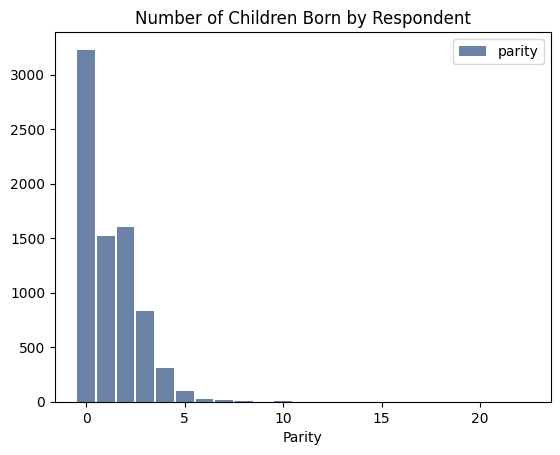

In [481]:
print(resp.parity.value_counts().sort_index())
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Config(title='Number of Children Born by Respondent', xlabel='Parity', ylablel='Count')

The distribution is positive-valued and right-skewed. Majority or respondents have 

In [509]:
hist.Largest(14)

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123), (2, 267), (1, 229), (0, 515)]

Let's investigate whether people with higher income have higher parity. Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question. But for now let's take it at face value.

Use `totincr` to select the respondents with the highest income (level 14). Plot the histogram of `parity` for just the high income respondents.

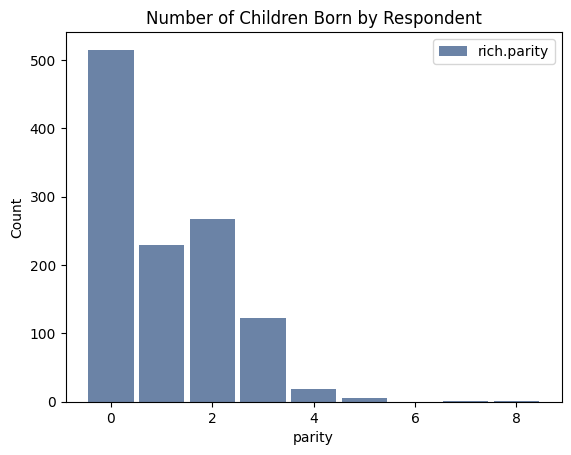

In [510]:
rich = resp[resp.totincr == 14]
hist = thinkstats2.Hist(rich.parity)
thinkplot.Hist(hist, label='rich.parity')
thinkplot.Config(title='Number of Children Born by Respondent', xlabel='parity', ylabel='Count')


Find the largest parities for the high income respondents.

In [511]:
# Solution
hist.Largest(10)

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123), (2, 267), (1, 229), (0, 515)]

Compare the mean `parity` for high income respondents and others

In [526]:
# Print the head of the dataframe to display the first 5 rows
not_rich = resp[resp.totincr < 14]
print(rich.parity.mean(), not_rich.parity.mean())

1.0758620689655172 1.2495758136665125


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [527]:
print(resp.age_r.value_counts().sort_index())
print(resp.age_r.min())
print(resp.age_r.max())

age_r
15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: count, dtype: int64
15
44


We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [528]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from preg like this:

In [529]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118445
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.494756
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.899417
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118445


How old is the respondent with `caseid` 1?

In [530]:
resp[resp.caseid==1].age_r

1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [531]:
preg[preg.caseid==2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5013?

In [532]:
preg[(preg.caseid==5013) & (pregordr==1)].birthwgt_lb

NameError: name 'pregordr' is not defined